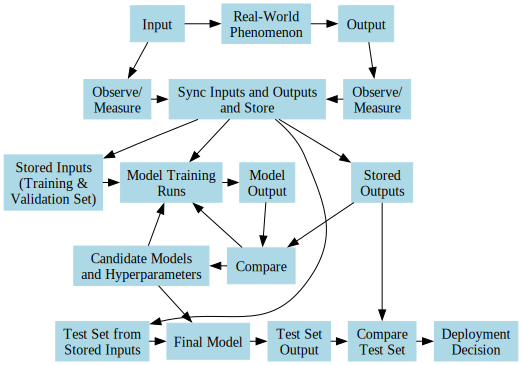

In [1]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Define node style
dot.attr('node', shape='box', style='filled', color='lightblue')

# Add nodes
dot.node('Input', 'Input')
dot.node('Phenomenon', 'Real-World\nPhenomenon')
dot.node('Output', 'Output')
dot.node('ObserveMeasure1', 'Observe/\nMeasure')
dot.node('Store', 'Sync Inputs and Outputs\nand Store')
dot.node('ObserveMeasure2', 'Observe/\nMeasure')
dot.node('StoredInputs', 'Stored Inputs\n(Training &\nValidation Set)')
dot.node('StoredOutputs', 'Stored\nOutputs')
dot.node('TrainModel', 'Model Training\nRuns')
dot.node('ModelOutput', 'Model\nOutput')
dot.node('Compare', 'Compare')
dot.node('CandidateModels', 'Candidate Models\nand Hyperparameters')
dot.node('TestSet', 'Test Set from\nStored Inputs')
dot.node('FinalModel', 'Final Model')
dot.node('TestSetOutput', 'Test Set\nOutput')
dot.node('CompareTestSet', 'Compare\nTest Set')
dot.node('DeployDecision', 'Deployment\nDecision')

# Add edges
dot.edge('Input', 'Phenomenon')
dot.edge('Phenomenon', 'Output')
dot.edge('Input', 'ObserveMeasure1')
dot.edge('Output', 'ObserveMeasure2')
dot.edge('ObserveMeasure1', 'Store')
dot.edge('Store', 'ObserveMeasure2', dir='back')
dot.edge('Store', 'StoredInputs')
dot.edge('Store', 'StoredOutputs')
dot.edge('Store', 'TrainModel')
dot.edge('StoredInputs', 'TrainModel')
dot.edge('StoredOutputs', 'Compare')
dot.edge('TrainModel', 'ModelOutput')
dot.edge('ModelOutput', 'Compare')
dot.edge('Compare', 'TrainModel')
dot.edge('CandidateModels', 'Compare', dir='back')
dot.edge('CandidateModels', 'TrainModel')
dot.edge('Store', 'TestSet')
dot.edge('TestSet', 'FinalModel')
dot.edge('CandidateModels', 'FinalModel')
dot.edge('FinalModel', 'TestSetOutput')
dot.edge('TestSetOutput', 'CompareTestSet')
dot.edge('StoredOutputs', 'CompareTestSet')
dot.edge('CompareTestSet', "DeployDecision")

# Ensure certain nodes are on the same rank
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('Input')
    s.node('Phenomenon')
    s.node('Output')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('ObserveMeasure1')
    s.node('Store')
    s.node('ObserveMeasure2')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('StoredInputs')
    s.node('TrainModel')
    s.node('ModelOutput')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('CandidateModels')
    s.node('Compare')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('TestSet')
    s.node('FinalModel')
    s.node('TestSetOutput')
    s.node('CompareTestSet')
    s.node('DeployDecision')

# Render the graph
dot.render('ml_overview', format='png')  # This will save the graph as a PNG file
dot  # This will display the graph in the Jupyter Notebook
